# Exploration of CRF weigths

In [2]:
%pylab inline

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


Reminder of the update rule:

$$
\left\{
    \begin{array}{ll}
        q_{i1} = sig(\delta_i) \\
        q_{i0} = sig(-\delta_i)
    \end{array}
\right.
\text{with }
\delta_i = \phi_{i1} - \phi_{i0} + \sum_j{q_{j0}\psi_{ij0} + q_{j1}\psi_{ij1}}
$$


Loading labels signification

In [3]:
file = open("class_list.txt","r")
labels_signification = []
s = file.readline()[2:-1]
while s != "":
    labels_signification.append(s)
    s = file.readline()[2:-1]

* Logistic_revression_v2/stage_2 step STEP

In [14]:
STEP = "20001"
psi_0 = np.load("experiments/thumos/moe/stage2/psi_0_" + STEP + ".npy")
psi_1 = np.load("experiments/thumos/moe/stage2/psi_1_" + STEP + ".npy")

In [15]:
psi_0 = np.reshape(psi_0, (65,65))
psi_1 = np.reshape(psi_1, (65,65))

# Exploration of $\psi_1$

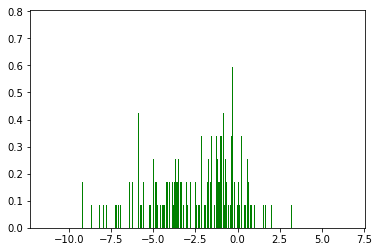

In [16]:
n, bins, patches = plt.hist(psi_1, 100, normed=1, facecolor='green')#, alpha=0.75)

Weights of $\psi_1$ grater than $threshold$: we print $(i,j)$ such that $\psi_{ij1} > threshold$.

*Interpretation:* the **occurence of $j$** detected by the original classifier **activates the occurence of $i$** ($occ(j) \implies occ(i)$)

In [30]:
threshold = 3
rows , cols = np.where(psi_1>threshold)

for i in range(len(rows)):
    print((labels_signification[rows[i]],labels_signification[cols[i]]))
    print(psi_1[rows[i],cols[i]])

(' HighJump', ' Fall')
3.5701494
(' PoleVault', ' PoleVaultPlantPole')
4.7073894
(' Shotput', ' ShotPutBend')
3.2114449
(' ThrowDiscus', ' DiscusWindUp')
3.2056606
(' Walk', 'BaseballPitch')
4.6175337
(' Sit', ' BodyTurn')
3.4565127
(' StandUp', ' BasketballGuard')
3.2685544
(' Stand', ' GolfSwing')
5.9694223
(' Stand', ' Shotput')
3.187568
(' Stand', ' SoccerPenalty')
3.743697
(' Stand', ' VolleyballSpiking')
3.948443
(' Stand', ' PatPerson')
3.565402
(' Stand', ' BodyTurn')
3.051281
(' Stand', ' VolleyballSet')
5.613883
(' Stand', ' VolleyballServe')
5.174328
(' Stand', ' PoleVaultPlantPole')
6.6744246
(' Stand', ' ShotPutBend')
3.287859
(' Run', ' HighFive')
3.4159024
(' Run', ' BasketballGuard')
4.0518117
(' Run', ' VolleyballBump')
4.8173246
(' Run', ' VolleyballServe')
4.8158503
(' Jump', ' BasketballShot')
3.1406975
(' Jump', ' VolleyballSet')
3.9637673
(' Jump', ' VolleyballBlock')
3.7840323
(' Jump', ' WeightliftingJerk')
4.763153
(' Jump', ' PoleVaultPlantPole')
3.8999743
(' 

Weights of $\psi_1$ lower than $threshold$: we print $(i,j)$ such that $\psi_{ij1} < threshold$.

*Interpretation:* the **occurence of $j$** detected by the original classifier **deactivates the occurence of $i$** ($occ(j) \implies \neg occ(i)$)

In [29]:
threshold = -8.5
rows , cols = np.where(psi_1<threshold)

for i in range(len(rows)):
    print((labels_signification[rows[i]],labels_signification[cols[i]]))
    print(psi_1[rows[i],cols[i]])

('BasketballDunk', ' SoccerPenalty')
-9.146905
('Billiards', ' Hug')
-10.324283
('Billiards', ' ClapHands')
-10.934373
('CleanAndJerk', ' HammerThrow')
-8.815717
('CleanAndJerk', ' SoccerPenalty')
-9.965295
('CricketShot', 'Billiards')
-9.280418
('CricketShot', ' PoleVault')
-8.53778
(' HighJump', ' SoccerPenalty')
-8.898249
(' JavelinThrow', 'FrisbeeCatch')
-8.957491
(' JavelinThrow', ' SoccerPenalty')
-9.913674
(' JavelinThrow', ' HammerThrowSpin')
-9.690054
(' Shotput', ' NoHuman')
-8.808339
(' SoccerPenalty', 'BasketballDunk')
-9.550938
(' SoccerPenalty', 'CleanAndJerk')
-9.32594
(' TennisSwing', ' LongJump')
-9.896654
(' TennisSwing', ' PoleVault')
-9.924739
(' ThrowDiscus', 'Billiards')
-8.870277
(' VolleyballSpiking', ' GolfSwing')
-10.19235
(' HighFive', ' JavelinThrow')
-8.528499
(' HighFive', ' DiscusWindUp')
-8.7592945
(' FistPump', ' GolfSwing')
-9.206601
(' ClapHands', 'Billiards')
-8.639292
(' OneRaisedArmCelebrate', ' TennisSwing')
-8.679265
(' Drop', ' DiscusWindUp')
-8

Heatmap

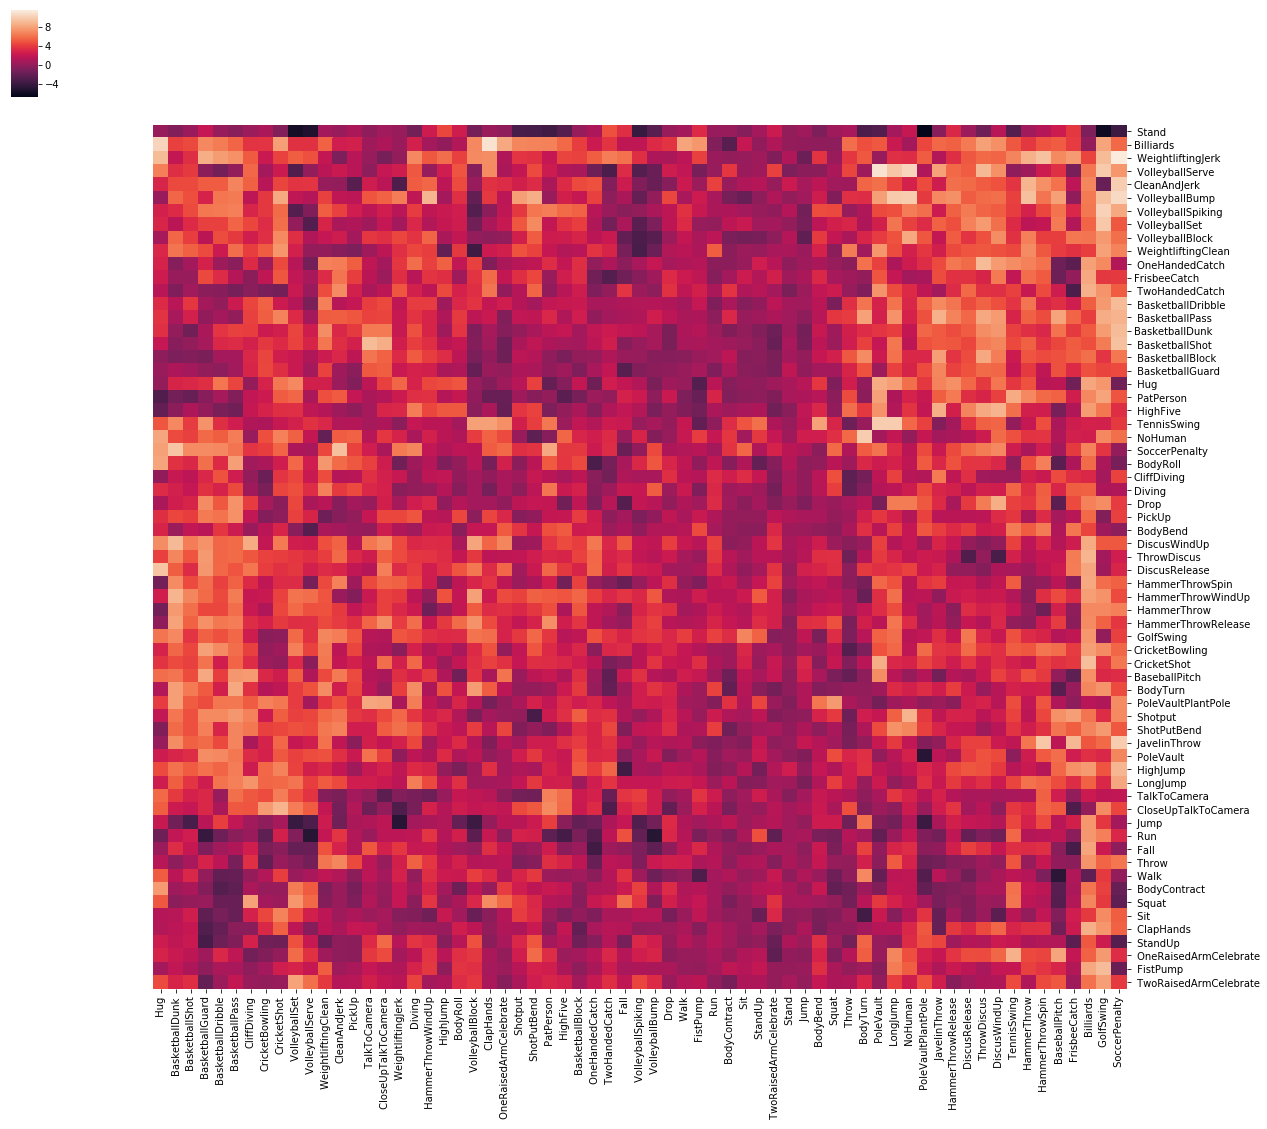

In [40]:
cg = sb.clustermap(-psi_1,
              method='average',
              xticklabels=labels_signification,
              yticklabels=labels_signification,
              figsize=(20,18))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

<center>
    <font color='#3e0e4c'>■ $occ(j) \implies \neg occ(i)$ </font>
    
    <font color='#ffdb00'>■ $occ(j) \implies occ(i)$ </font>
</center>

# Exploration of $\psi_0$

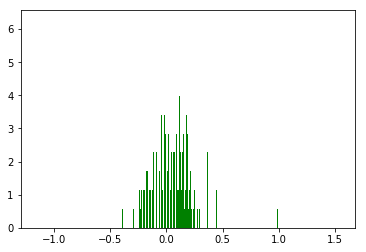

In [21]:
n, bins, patches = plt.hist(psi_0, 100, normed=1, facecolor='green')#, alpha=0.75)

Weights of $\psi_0$ grater than $threshold$: we print $(i,j)$ such that $\psi_{ij0} > threshold$.

*Interpretation:* the **non-occurence of $j$** detected by the original classifier **activates the occurence of $i$** ($\neg occ(j) \implies occ(i)$)

In [28]:
threshold = 0.5
rows , cols = np.where(psi_0>threshold)

for i in range(len(rows)):
    print((labels_signification[rows[i]],labels_signification[cols[i]]))
    print(psi_0[rows[i],cols[i]])

('Billiards', ' NoHuman')
0.9364393
('CleanAndJerk', ' Stand')
0.78300667
(' GolfSwing', ' TalkToCamera')
1.5461605
(' HammerThrow', ' ThrowDiscus')
0.5249143
(' HighJump', ' Walk')
0.63455343
(' LongJump', ' Walk')
0.62074876
(' SoccerPenalty', ' Stand')
0.50475466
(' ThrowDiscus', ' HammerThrow')
0.7043579
(' VolleyballSpiking', ' Walk')
1.0038604
(' Fall', ' Walk')
0.6310753
(' PickUp', ' Stand')
0.9168657
(' PickUp', ' WeightliftingJerk')
0.53037196
(' TwoRaisedArmCelebrate', ' Walk')
0.64384747
(' Throw', ' Walk')
0.502702
(' BasketballGuard', ' Stand')
0.653713
(' VolleyballSet', ' Walk')
0.71313554
(' WeightliftingClean', ' Stand')
1.0767698
(' WeightliftingJerk', ' Stand')
0.63562906
(' HammerThrowWindUp', ' HammerThrowSpin')
1.0699075


Weights of $\psi_0$ lower than $threshold$: we print $(i,j)$ such that $\psi_{ij0} < threshold$.

*Interpretation:* the **non-occurence of $j$** detected by the original classifier **deactivates the occurence of $i$** ($\neg occ(j) \implies \neg occ(i)$)

In [27]:
threshold = -0.5
rows , cols = np.where(psi_0<threshold)

for i in range(len(rows)):
    print((labels_signification[rows[i]],labels_signification[cols[i]]))
    print(psi_0[rows[i],cols[i]])

('BasketballDunk', ' Jump')
-0.50498563
(' JavelinThrow', ' Run')
-0.5115163
(' ThrowDiscus', ' DiscusWindUp')
-0.553091
(' PatPerson', ' Walk')
-0.77104896
(' TwoHandedCatch', ' Stand')
-0.6858612
(' BasketballDribble', ' Run')
-0.7462945
(' BasketballBlock', 'BasketballDunk')
-0.506985
(' BasketballShot', ' Jump')
-0.5710482
(' BasketballGuard', ' Run')
-0.91692525
(' VolleyballSet', ' Jump')
-0.5014996
(' VolleyballBump', ' Sit')
-0.8623772
(' VolleyballServe', ' Stand')
-1.1606405
(' WeightliftingClean', 'CleanAndJerk')
-0.68368864
(' WeightliftingJerk', 'CleanAndJerk')
-0.562023
(' HammerThrowWindUp', ' HammerThrow')
-0.55492747
(' PoleVaultPlantPole', ' Stand')
-0.575968
(' TalkToCamera', ' CloseUpTalkToCamera')
-0.6951192
(' CloseUpTalkToCamera', ' TalkToCamera')
-1.053031


Heatmap

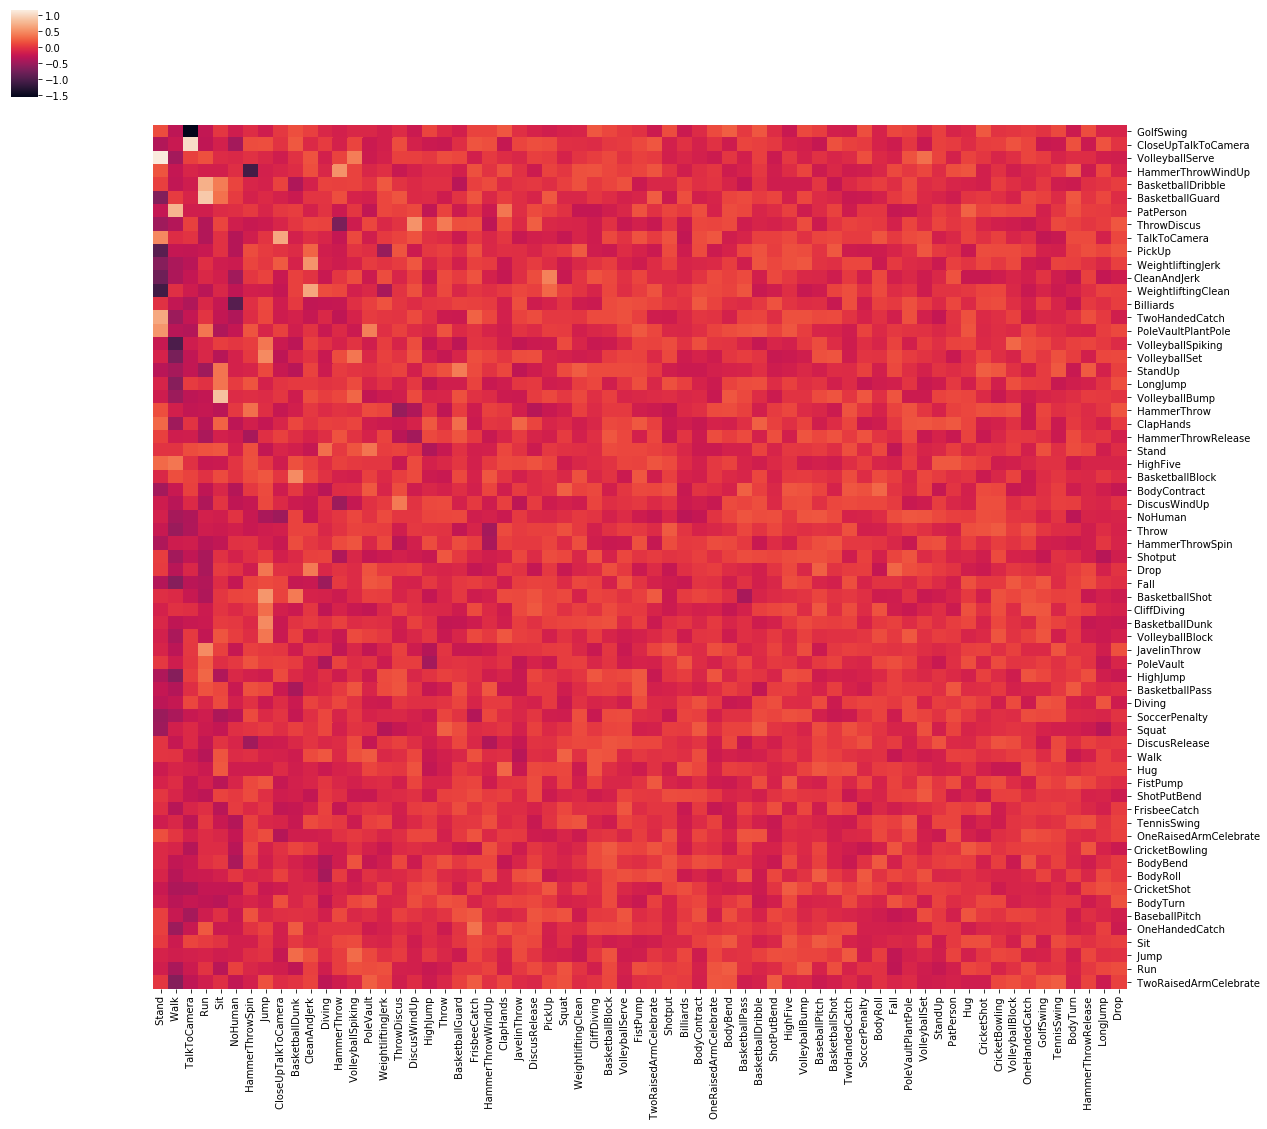

In [41]:
cg = sb.clustermap(-psi_0,
              method='average',
              xticklabels=labels_signification,
              yticklabels=labels_signification,
              figsize=(20,18))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

<center>
    <font color='#3e0e4c'>■ $\neg occ(j) \implies \neg occ(i)$ </font>
    
    <font color='#ffdb00'>■ $\neg occ(j) \implies occ(i)$ </font>
</center>